## Experiments with Diabetes Data

In [1]:
# pip install scipy

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats    
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


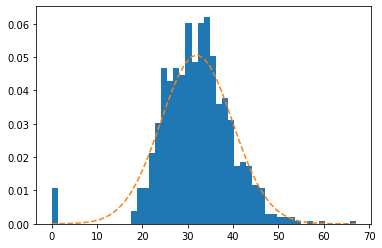

In [6]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['BMI'], 50, density=True)

sigma = np.std(df['BMI'])
mu = np.mean(df['BMI'])
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

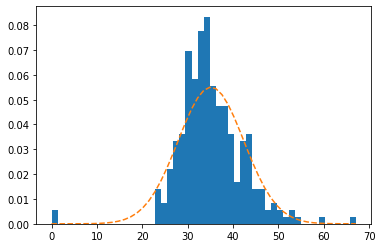

In [7]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df[df['Outcome']>0.8]['BMI'], 50, density=True)
diabetes_recs = df[df['Outcome']>0.8]
sigma_d = np.std(df[df['Outcome']>0.8]['BMI'])
mu_d = np.mean(df[df['Outcome']>0.8]['BMI'])
# add a 'best fit' line
yb = ((1 / (np.sqrt(2 * np.pi) * sigma_d)) *
     np.exp(-0.5 * (1 / sigma_d * (bins - mu_d))**2))
ax.plot(bins, yb, '--')

In [8]:
print(sigma_d, sigma, mu, mu_d)

7.249404266473001 7.87902573154013 31.992578124999998 35.14253731343284


In [9]:
7.879/np.sqrt(len(diabetes_recs))

0.4812865260416644

In [10]:
df[df['Outcome']==1].mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [11]:
bmi_outcome = df[['BMI','Age','Outcome']]

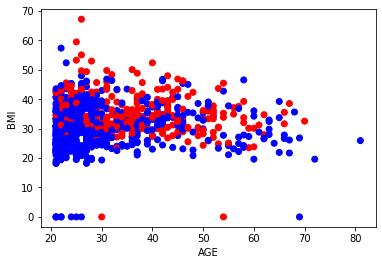

In [223]:
fig, ax = plt.subplots()
ax.scatter(bmi_outcome['Age'],bmi_outcome['BMI'],color=['red' if o > 0.8 else 'blue' for o in bmi_outcome['Outcome']])
a = ax.set_xlabel("AGE")
b = ax.set_ylabel("BMI")

In [13]:
bmi_outcome[bmi_outcome['Outcome'] > 0.8].describe()

,BMI,Age,Outcome
count,268.000000,268.000000,268.0
mean,35.142537,37.067164,1.0
std,7.262967,10.968254,0.0
min,0.000000,21.000000,1.0
25%,30.800000,28.000000,1.0
50%,34.250000,36.000000,1.0
75%,38.775000,44.000000,1.0
max,67.100000,70.000000,1.0


In [14]:
pedigree_outcome = df[['DiabetesPedigreeFunction','Outcome','BMI']]

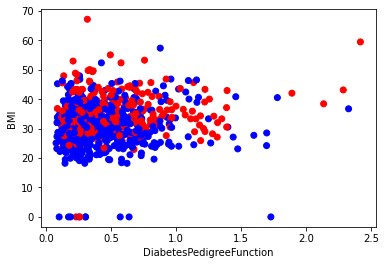

In [224]:
fig, ax = plt.subplots()
ax.scatter(pedigree_outcome['DiabetesPedigreeFunction'],pedigree_outcome['BMI'],color=['red' if o > 0.8 else 'blue' for o in pedigree_outcome['Outcome']])
a = ax.set_xlabel("DiabetesPedigreeFunction")
b = ax.set_ylabel("BMI")

In [16]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(pedigree_outcome['DiabetesPedigreeFunction'])

In [17]:
print (f"alpha: {fit_alpha}, loc: {fit_loc}, beta: {fit_beta}")

alpha: 1.5869013338294626, loc: 0.07670028444557661, beta: 0.24902575812405062


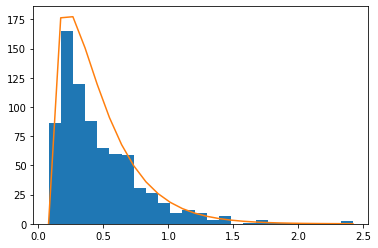

In [18]:
fig, ax = plt.subplots()
nbins = 25
n, bins, patches = ax.hist(pedigree_outcome['DiabetesPedigreeFunction'], bins=nbins)
x = np.linspace(0,2.5,nbins+1)
y1 = stats.gamma.pdf(x, a=fit_alpha, scale=fit_beta) * 100
ax.plot(bins,y1,'-')


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
lmodel = LinearRegression()

In [21]:
trainx, testx, trainy, testy = train_test_split(df[[col for col in df.columns if col != 'Outcome']].values, df['Outcome'], test_size=0.3)

In [22]:
lmodel.fit(trainx, trainy)

LinearRegression()

In [23]:
prediction = lmodel.predict(testx)

In [24]:
prediction[[prediction > 0.5]] = 1

<ipython-input-24-d9296ea19e92>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prediction[[prediction > 0.5]] = 1


In [25]:
prediction[[prediction < 1]] = 0

<ipython-input-25-f5453e55cdce>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prediction[[prediction < 1]] = 0


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(testy, prediction))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, C=10)

In [29]:
logmodel.fit(trainx, trainy)

LogisticRegression(C=10, max_iter=1000)

In [30]:
prediction = logmodel.predict(testx)

In [31]:
print(classification_report(testy, prediction))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



<BarContainer object of 8 artists>

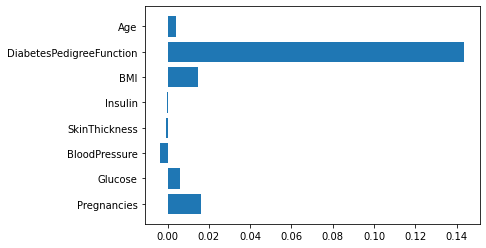

In [32]:
fig,ax = plt.subplots()
ax.barh(width=lmodel.coef_, y=[col for col in df.columns if col != 'Outcome'])

In [33]:
lmodel.coef_

array([ 1.61017424e-02,  5.80844847e-03, -3.69243459e-03, -6.47978011e-04,
       -1.10151010e-04,  1.45398646e-02,  1.43640270e-01,  4.16924652e-03])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [35]:
df[df['BloodPressure']==0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [36]:
linpipeline = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', LinearRegression())
                       ])

In [37]:
linpipeline.fit(trainx, trainy)

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [38]:
preds = linpipeline.predict(testx)

In [39]:
preds[np.argwhere(preds>=0.5).flatten()] = 1

In [40]:
preds[np.argwhere(preds<1).flatten()]=0

In [41]:
print(classification_report(testy, preds))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



<BarContainer object of 8 artists>

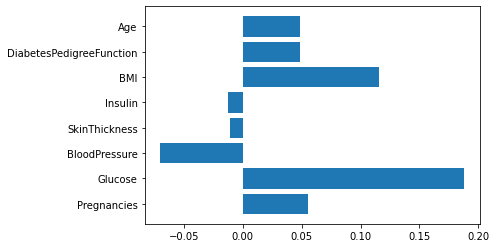

In [42]:
fig, ax = plt.subplots()
ax.barh(width=linpipeline['model'].coef_, y = [col for col in df.columns if col != 'Outcome'])

In [43]:
dfnew = df[df.columns]

In [44]:
dfnew['BMI'] = dfnew['BMI'].replace({0:np.nan})

In [45]:
dfnew['BloodPressure'] = dfnew['BloodPressure'].replace({0:np.nan})

In [46]:
dfnew['SkinThickness'] = dfnew['SkinThickness'].replace({0:np.nan})

In [47]:
trainxn, testxn, trainyn, testyn = train_test_split(dfnew[[col for col in dfnew.columns if col != 'Outcome']].values, dfnew['Outcome'], test_size=0.3)

In [48]:
linpipeline2 = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', LinearRegression())
                       ])

In [49]:
linpipeline2.fit(trainxn, trainyn)

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [67]:
predsn = linpipeline2.predict(testxn)
predsn[np.argwhere(predsn>=0.65).flatten()] = 1
predsn[np.argwhere(predsn<1).flatten()]=0

In [68]:
print(classification_report(testyn, predsn))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       152
           1       0.88      0.37      0.52        79

    accuracy                           0.77       231
   macro avg       0.81      0.67      0.68       231
weighted avg       0.79      0.77      0.73       231



<BarContainer object of 8 artists>

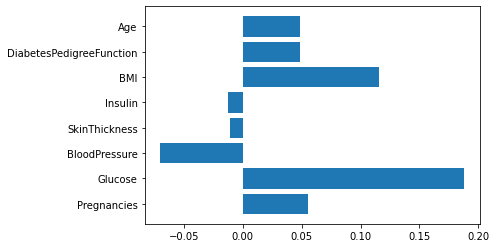

In [52]:
fig, ax = plt.subplots()
ax.barh(width=linpipeline['model'].coef_, y = [col for col in df.columns if col != 'Outcome'])

<BarContainer object of 2 artists>

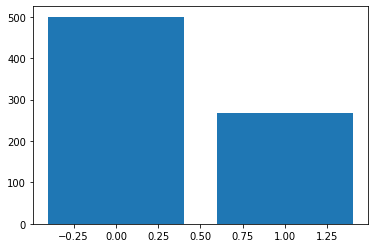

In [66]:
plt.bar(height=df['Outcome'].value_counts().values,x=[0,1])

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
treepipeline = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', DecisionTreeClassifier())
                       ])

In [74]:
treepipeline.fit(trainxn, trainyn)
dt = DecisionTreeClassifier()
dt.fit(trainx, trainy)

DecisionTreeClassifier()

In [73]:
print(classification_report(testyn, treepipeline.predict(testxn)))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       152
           1       0.49      0.56      0.52        79

    accuracy                           0.65       231
   macro avg       0.62      0.63      0.63       231
weighted avg       0.66      0.65      0.66       231



In [76]:
print(classification_report(testy, dt.predict(testx)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       150
           1       0.55      0.49      0.52        81

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.68      0.68       231



In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
boostpipeline = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', AdaBoostClassifier())
                       ])

In [80]:
boostpipeline.fit(trainxn, trainyn)
print(classification_report(testyn, boostpipeline.predict(testxn)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       152
           1       0.62      0.54      0.58        79

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231



<BarContainer object of 17 artists>

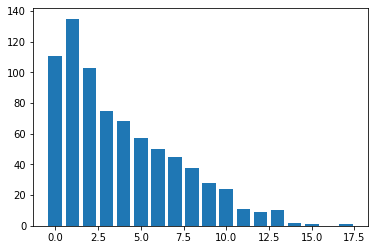

In [92]:
plt.bar(height=df['Pregnancies'].value_counts(), x=df['Pregnancies'].value_counts().index.values)

In [171]:
df_new = df[[col for col in df.columns if col != 'Pregnancies' and col != 'Insulin']]

In [172]:
trainxn, testxn, trainyn, testyn = train_test_split(df_new[[col for col in df_new.columns if col != 'Outcome']].values, df_new['Outcome'], test_size=0.3)

In [173]:
linpipeline_nop = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', LinearRegression())
                       ])

In [174]:
linpipeline_nop.fit(trainxn, trainyn)

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [175]:
predsnp = linpipeline_nop.predict(testxn)
predsnp[np.argwhere(predsnp>=0.40).flatten()] = 1
predsnp[np.argwhere(predsnp<1).flatten()]=0

In [176]:
print(classification_report(testyn, predsnp))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.77      0.66      0.71        86

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231



In [177]:
adabmodel = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', AdaBoostClassifier())
                       ])

In [178]:
adabmodel.fit(trainxn, trainyn)
print(classification_report(testyn, adabmodel.predict(testxn)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       145
           1       0.76      0.60      0.68        86

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



<BarContainer object of 6 artists>

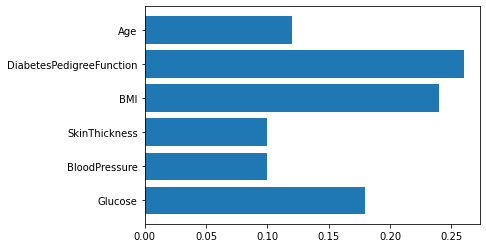

In [179]:
plt.barh(y=[col for col in df_new.columns if col != 'Outcome'], width=adabmodel['model'].feature_importances_)

In [180]:
df_new.corr()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.392573,0.183928,-0.113970,0.074752
BMI,0.221071,0.281805,0.392573,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.292695,0.173844,0.238356,1.000000


In [181]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [189]:
pl = Pipeline([('scaler', StandardScaler()),
#         ('Imputer', KNNImputer()),
        ('dimreduction', PCA(n_components=6)),
        ('linreg', LinearRegression())])

In [190]:
pl.fit(trainxn, trainyn)
predsnp1 = pl.predict(testxn)
predsnp1[np.argwhere(predsnp1>=0.45).flatten()] = 1
predsnp1[np.argwhere(predsnp1<1).flatten()]=0

In [184]:
print(classification_report(testyn, predsnp1))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       145
           1       0.36      0.36      0.36        86

    accuracy                           0.52       231
   macro avg       0.49      0.49      0.49       231
weighted avg       0.52      0.52      0.52       231



In [197]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [207]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(10),
              scoring=metrics.make_scorer(metrics.f1_score))
rfecv.fit(trainxn, trainyn)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring=make_scorer(f1_score))

In [208]:
predsnp2 = rfecv.predict(testxn)
predsnp2[np.argwhere(predsnp2>=0.45).flatten()] = 1
predsnp2[np.argwhere(predsnp2<1).flatten()]=0

In [209]:
print(classification_report(testyn, predsnp2))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       145
           1       0.81      0.51      0.63        86

    accuracy                           0.77       231
   macro avg       0.79      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231



In [211]:
rfecv.get_support()

array([ True, False, False,  True,  True,  True])

In [221]:
imp_features = np.array([col for col in df_new.columns if col != 'Outcome'])[rfecv.get_support()].tolist()
print (f" Important Features are: {imp_features}")

 Important Features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [230]:
dff = df[imp_features+['Outcome']]
trainx_trim, testx_trim, trainy_trim, testy_trim = train_test_split(dff[[col for col in dff.columns if col!='Outcome']].values, dff['Outcome'], test_size=0.3)

In [259]:
adabmodel = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=25, learning_rate=0.5))
                       ])
adabmodel.fit(trainx_trim, trainy_trim)
print(classification_report(testy_trim, adabmodel.predict(testx_trim)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       152
           1       0.71      0.53      0.61        79

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [247]:
linpipeline_trim = Pipeline([('imputer', KNNImputer()),
                        ('scaler', StandardScaler()),
                        ('model', LinearRegression())
                       ])
linpipeline_trim.fit(trainx_trim, trainy_trim)
predsnp3 = linpipeline_trim.predict(testx_trim)
predsnp3[np.argwhere(predsnp3>=0.45).flatten()] = 1
predsnp3[np.argwhere(predsnp3<1).flatten()]=0

In [243]:
print(classification_report(testy_trim, predsnp3))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       152
           1       0.66      0.63      0.65        79

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

